<a href="https://colab.research.google.com/github/keremcaltugg/ML_exercises/blob/main/iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
print(iris['DESCR'])

### **Features**

In [ ]:
# Feature columns 
df = pd.DataFrame(X, columns=iris.feature_names)

# Label column 
df['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


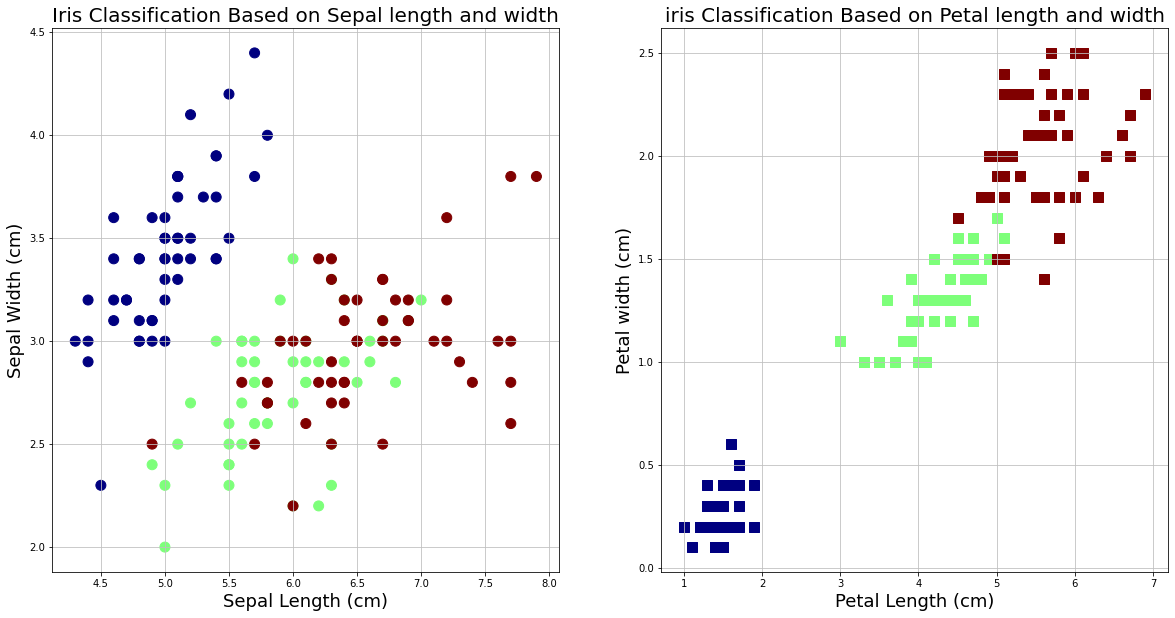

In [ ]:
from matplotlib import cm

# Petal Length and Width
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax.set_title('Iris Classification Based on Sepal length and width', fontsize=20)
ax.set_xlabel('Sepal Length (cm)', fontsize=18)
ax.set_ylabel('Sepal Width (cm)',fontsize=18)
# setting grid lines 
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], s = 100, 
           c=df['target'], marker='o', cmap=cm.jet)

# Sepal Length and Width
ax = fig.add_subplot(122)
ax.set_title("iris Classification Based on Petal length and width", fontsize=20)
ax.set_xlabel('Petal Length (cm)', fontsize=18)
ax.set_ylabel('Petal width (cm)', fontsize=18)
ax.grid(True, linestyle='-', color='0.75')
ax.scatter(df['petal length (cm)'], df['petal width (cm)'], s = 100, 
           c=df['target'], marker='s', cmap=cm.jet)

### **K Nearest Neighbors**
-- Training a model on the data = 'fitting' a model to the data 
.fit() method 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8) # Setting "k" value 
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=8)

-- Time to predicting labels on unlabeled data .predict() method

In [ ]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)

print("Prediction: {}".format(prediction))

Prediction: [1 1 0]


### **Train and Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)

Response for test dataset:
[1 0 1 2 2 0 0 1 0 0 1 1 0 2 1 0 0 1 1 0 2 0 1 2 1 0 1 2 2 2 2 2 1 1 0 0 2
 0 2 1 2 1 1 0 0]


In [ ]:
score = knn.score(X_test, y_test)
print("Accuracy of the model:")
print(score)

Accuracy of the model:
0.9555555555555556
